# ML in Genomics 
## LSTM-1 Training
### Team Members:
    1. Hrishikesh Mahajan
    2. Pratik Kamble
    3. Smridhi Bhat
    4. Yash Shekhadar

In [26]:
# Basic Imports
import gzip as gz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import random

# Keras Imports 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Masking
from keras.regularizers import l2
from keras.layers import Dropout
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [27]:
f = gz.GzipFile("/content/drive/MyDrive/MLG/CULLPDB-Train.npy.gz", "r")
train_raw = np.load(f)
train_data = train_raw.reshape((len(train_raw), 700, 57))
train_x = train_data[:, :, 0:21]
train_y = train_data[:, :, 22:30]

In [3]:
f = gz.GzipFile("/content/drive/MyDrive/MLG/CULLPDB-Test.npy.gz", "r")
test_raw = np.load(f)
test_data = test_raw.reshape((len(test_raw), 700, 57))
test_x = test_data[:, :, 0:21]
test_y = test_data[:, :, 22:30]

In [4]:
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(700, 21)))
model.add(LSTM(64, return_sequences=True))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',  'mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 700, 21)           0         
                                                                 
 lstm (LSTM)                 (None, 700, 64)           22016     
                                                                 
 dense (Dense)               (None, 700, 16)           1040      
                                                                 
 dense_1 (Dense)             (None, 700, 8)            136       
                                                                 
Total params: 23,192
Trainable params: 23,192
Non-trainable params: 0
_________________________________________________________________


In [5]:
filepath = '/content/drive/MyDrive/MLG/Model-1/Model-1.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

In [6]:
history = model.fit(train_x, train_y, epochs=40, validation_data = (test_x, test_y), batch_size=32,callbacks=[checkpoint])

Epoch 1/40
168/168 [==============================] - ETA: 0s - loss: 0.5095 - acc: 0.3550 - mae: 0.1933
Epoch 1: val_loss improved from inf to 0.37725, saving model to /content/drive/MyDrive/MLG/Model-1/Model-1.hdf5
168/168 [==============================] - 28s 116ms/step - loss: 0.5095 - acc: 0.3550 - mae: 0.1933 - val_loss: 0.3773 - val_acc: 0.3786 - val_mae: 0.1894
Epoch 2/40
168/168 [==============================] - ETA: 0s - loss: 0.4671 - acc: 0.4148 - mae: 0.1802
Epoch 2: val_loss improved from 0.37725 to 0.36431, saving model to /content/drive/MyDrive/MLG/Model-1/Model-1.hdf5
168/168 [==============================] - 18s 106ms/step - loss: 0.4671 - acc: 0.4148 - mae: 0.1802 - val_loss: 0.3643 - val_acc: 0.4045 - val_mae: 0.1812
Epoch 3/40
168/168 [==============================] - ETA: 0s - loss: 0.4590 - acc: 0.4328 - mae: 0.1769
Epoch 3: val_loss improved from 0.36431 to 0.36176, saving model to /content/drive/MyDrive/MLG/Model-1/Model-1.hdf5
168/168 [====================

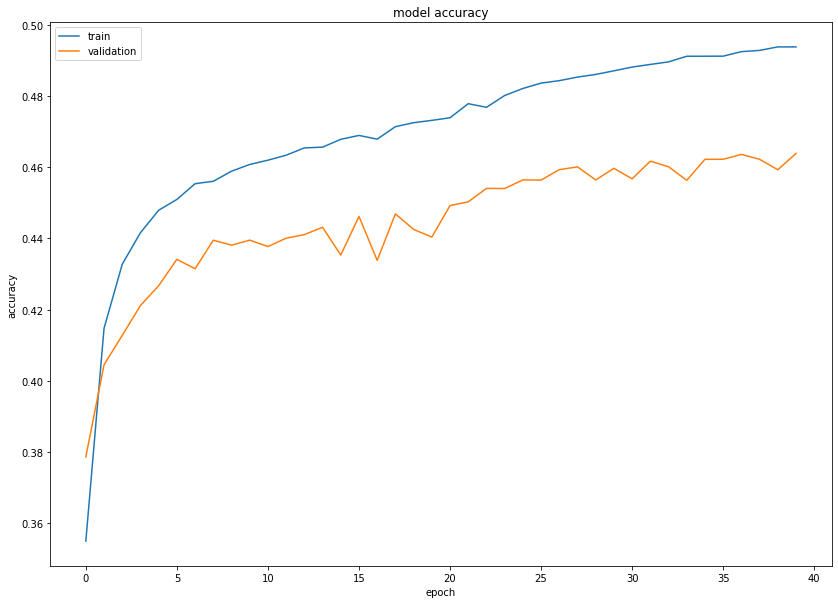

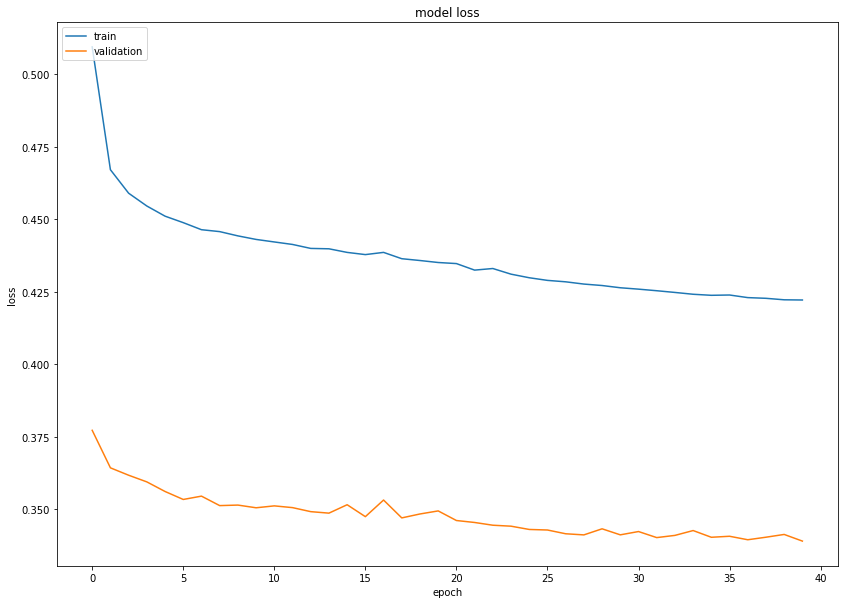

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10

# "Accuracy"
fig = plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [19]:
model.save("/content/drive/MyDrive/MLG/Model-1/D1.h5")
file = open("/content/drive/MyDrive/MLG/Model-1/D1.history", "wb")
pkl.dump(history, file)

INFO:tensorflow:Assets written to: ram://18fd7632-83ec-4546-8f85-6237e8ffa4a2/assets


INFO:tensorflow:Assets written to: ram://18fd7632-83ec-4546-8f85-6237e8ffa4a2/assets


In [8]:
test_pred = model.predict(np.array([test_x[0]]))

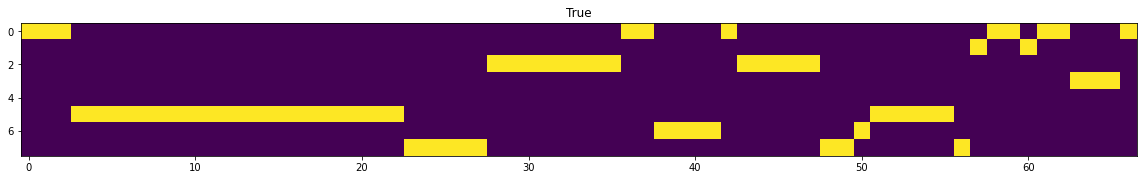

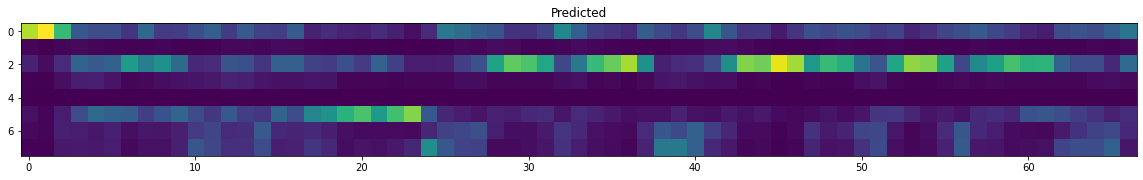

In [21]:
plt.figure(figsize=(20,4))
plt.title("True")
plt.imshow(test_y[0][0:67].T)
plt.figure(figsize=(20,4))
plt.title("Predicted")
plt.imshow(test_pred[0][0:67].T)

In [22]:
import tensorflow

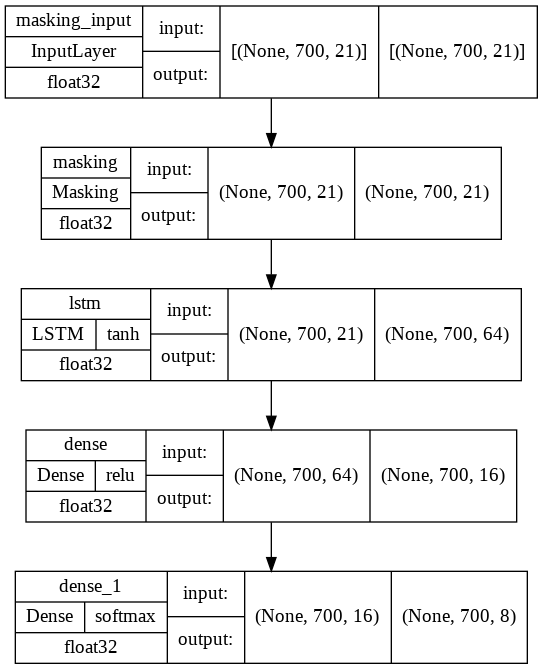

In [24]:
tensorflow.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)